In [55]:
# ==============================================================================
# C-0: ENVIRONMENT SETUP AND PROJECT PATHS
# ==============================================================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
sns.set(style="whitegrid")

# Directories
data_dir = "../data"
figures_dir = "../figures"
models_dir = "../models"

os.makedirs(figures_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)

print("Paths set:")
print("Data:", data_dir)
print("Figures:", figures_dir)
print("Models:", models_dir)

Paths set:
Data: ../data
Figures: ../figures
Models: ../models



Dataset loaded successfully: 284807 rows, 31 columns
Found 1081 duplicate rows. Dropping them...
Data shape after removing duplicates: (283726, 31)

No missing values found.

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Time     283726 non-null  float64
 1   V1       283726 non-null  float64
 2   V2       283726 non-null  float64
 3   V3       283726 non-null  float64
 4   V4       283726 non-null  float64
 5   V5       283726 non-null  float64
 6   V6       283726 non-null  float64
 7   V7       283726 non-null  float64
 8   V8       283726 non-null  float64
 9   V9       283726 non-null  float64
 10  V10      283726 non-null  float64
 11  V11      283726 non-null  float64
 12  V12      283726 non-null  float64
 13  V13      283726 non-null  float64
 14  V14      283726 non-null  float64
 15  V15      283726 non-null  flo

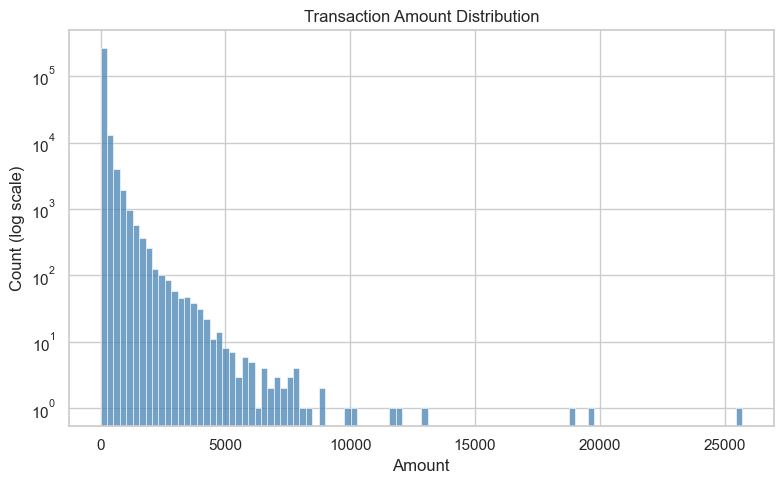

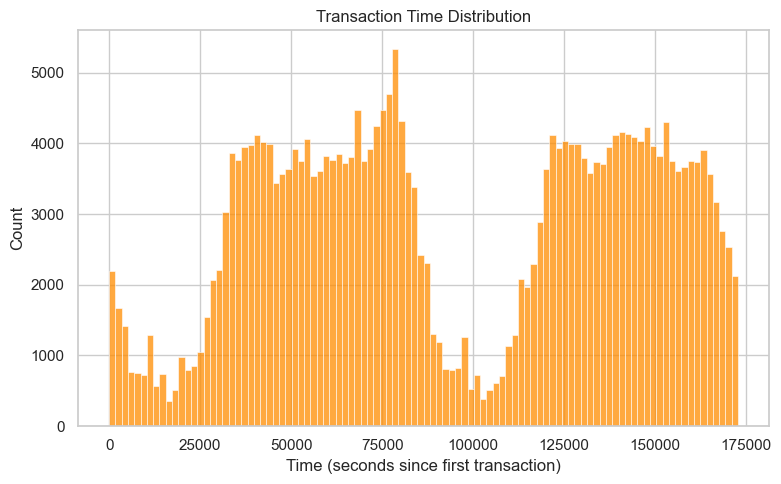

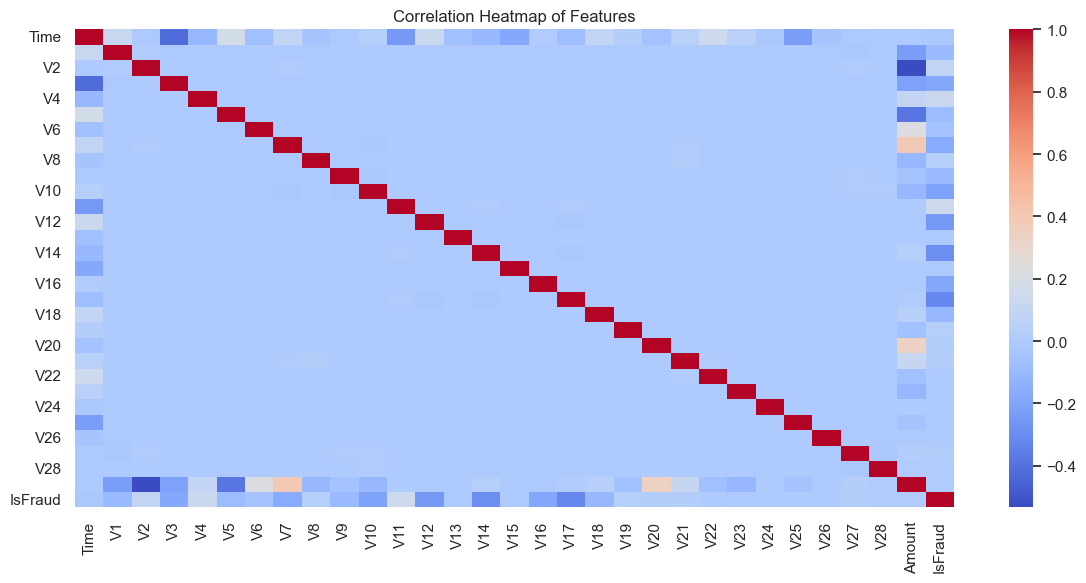


Cleaned dataset saved to: ../data\creditcard_clean.csv


In [56]:
# ==============================================================================
# C-1: EXPLORATORY DATA ANALYSIS (EDA) AND PREPROCESSING
# ==============================================================================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load dataset with error handling ---
data_path = os.path.join(data_dir, "creditcard.csv")
try:
    df = pd.read_csv(data_path)
    print(
        f"\nDataset loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print("Error: Dataset not found. Please check the path.")
    import sys
    sys.exit()

# --- Drop duplicates ---
duplicates = df.duplicated().sum()
if duplicates:
    print(f"Found {duplicates} duplicate rows. Dropping them...")
    df.drop_duplicates(inplace=True)
print("Data shape after removing duplicates:", df.shape)

# --- Check for missing values ---
missing = df.isnull().sum()
if missing.any():
    print(f"\nMissing values found. Dropping NA...")
    df.dropna(inplace=True)
else:
    print("\nNo missing values found.")

# --- Rename target column for clarity ---
df.rename(columns={'Class': 'IsFraud'}, inplace=True)

# --- Dataset info ---
print("\n--- Dataset Info ---")
df.info()

# --- Class distribution ---
fraud_counts = df['IsFraud'].value_counts()
fraud_percentage = (fraud_counts.get(1, 0) / len(df)) * 100
print("\n--- Class Distribution ---")
print(fraud_counts)
print(f"Fraudulent transactions percentage: {fraud_percentage:.4f}%")

# --- Summary statistics ---
print("\n--- Summary Statistics ---")
print(df.describe())

# --- Preview data ---
print("\n--- Sample Rows ---")
print(df.head())

# --- Ensure top-level reports/figures directory exists ---
reports_figures_dir = os.path.join("..", "reports", "figures")
os.makedirs(reports_figures_dir, exist_ok=True)

# --- Plot: Transaction Amount Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(df["Amount"], bins=100, color="steelblue")
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Count (log scale)")
plt.yscale("log")
plt.tight_layout()
plt.savefig(os.path.join(reports_figures_dir, "amount_distribution.png"))
plt.show()

# --- Plot: Transaction Time Distribution (histogram) ---
plt.figure(figsize=(8, 5))
sns.histplot(df["Time"], bins=100, color="darkorange")
plt.title("Transaction Time Distribution")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(reports_figures_dir, "time_distribution.png"))
plt.show()

# --- Correlation heatmap ---
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.savefig(os.path.join(reports_figures_dir, "correlation_heatmap.png"))
plt.show()

# --- Save clean copy ---
clean_data_path = os.path.join(data_dir, "creditcard_clean.csv")
df.to_csv(clean_data_path, index=False)
print(f"\nCleaned dataset saved to: {clean_data_path}")

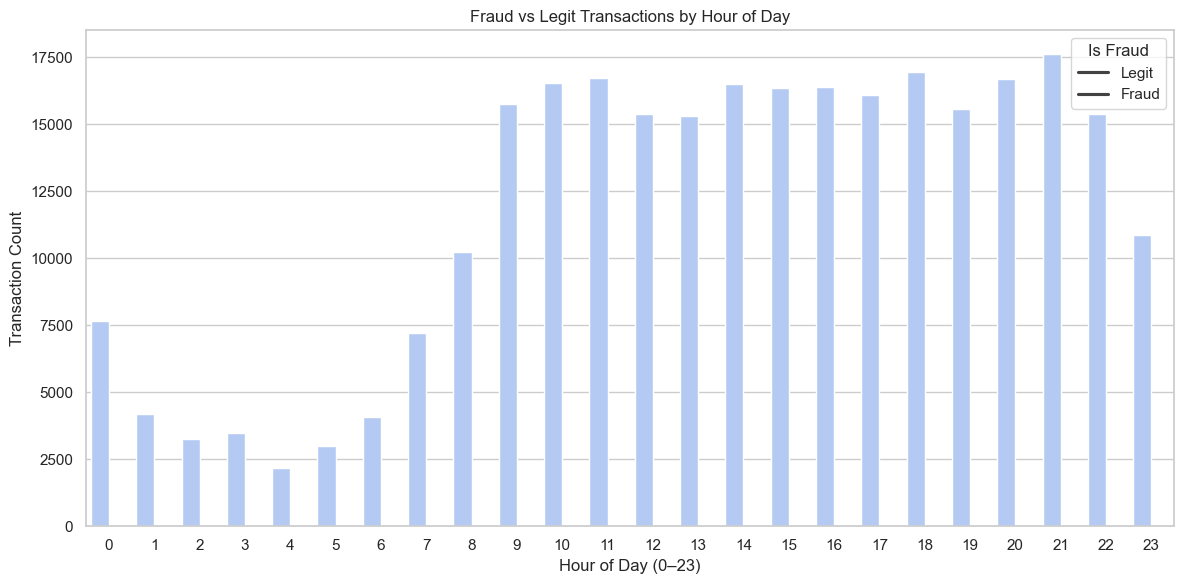

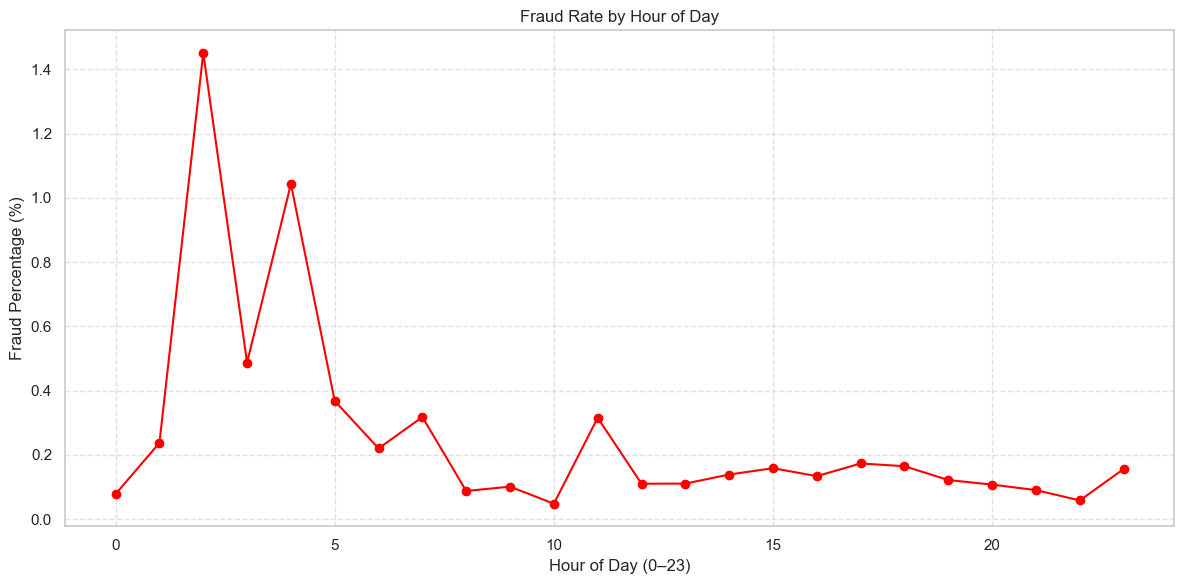

In [57]:
# ==============================================================================
# C-1b: TIME SERIES ANALYSIS
# Goal: Explore fraud patterns over time and save charts to reports/figures
# ==============================================================================

# Step 1: Import required packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 2: Ensure reports/figures directory exists
reports_figures_dir = os.path.join("..", "reports", "figures")
os.makedirs(reports_figures_dir, exist_ok=True)

# Step 3: Convert Time (seconds) to Hour of Day (0–23)
df['HourOfDay'] = ((df['Time'] // 3600) % 24).astype(int)

# ==============================================================================
# 1. Fraud vs Legit Counts by Hour of Day
# ==============================================================================
hour_counts = df.groupby(['HourOfDay', 'IsFraud']
                         ).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=hour_counts,
    x='HourOfDay',
    y='Count',
    hue='IsFraud',
    palette='coolwarm'
)
plt.title('Fraud vs Legit Transactions by Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud', labels=['Legit', 'Fraud'])
plt.tight_layout()
plt.savefig(os.path.join(reports_figures_dir, "fraud_by_hour_counts.png"))
plt.show()

# ==============================================================================
# 2. Fraud Rate (%) by Hour of Day
# ==============================================================================
fraud_rate = df.groupby('HourOfDay')['IsFraud'].mean() * 100

plt.figure(figsize=(12, 6))
fraud_rate.plot(kind='line', marker='o', color='red')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Fraud Percentage (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(os.path.join(reports_figures_dir, "fraud_rate_by_hour.png"))
plt.show()


--- Baseline Classification Report ---
              precision    recall  f1-score   support

           0     0.9998    0.9750    0.9872     56651
           1     0.0553    0.8737    0.1039        95

    accuracy                         0.9748     56746
   macro avg     0.5275    0.9243    0.5456     56746
weighted avg     0.9982    0.9748    0.9857     56746


--- Baseline Metrics ---
Recall:    0.8737
Precision: 0.0553
PR AUC:    0.6735
ROC AUC:   0.9685


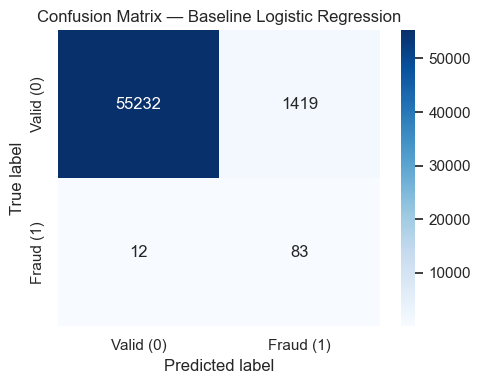


Cross-validated PR AUC (5-fold): 0.7371 ± 0.1195


In [58]:
# ==============================================================================
# C-2: BASELINE MODEL (LOGISTIC REGRESSION)
# Goal: Build and evaluate a simple baseline logistic regression model
# ==============================================================================

# Step 1: Import required packages
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, recall_score, precision_score,
    average_precision_score, roc_auc_score, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 2: Select numeric features only (exclude non-numeric like DateTime)
feature_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols.remove("IsFraud")  # remove target
X = df[feature_cols].copy()
y = df["IsFraud"].copy()

# Step 3: Train/test split (stratified to preserve class ratios)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# Step 4: ColumnTransformer for scaling numeric features
# Only scale "Time" and "Amount"; leave others as-is
scaler = ColumnTransformer([
    ("time_amount_scaler", StandardScaler(), ["Time", "Amount"])
], remainder="passthrough")

# Step 5: Create baseline pipeline
baseline_model = Pipeline(steps=[
    ("scaler", scaler),
    ("logreg", LogisticRegression(
        max_iter=200,
        class_weight="balanced",  # handle class imbalance
        random_state=RANDOM_STATE,
        n_jobs=-1
    ))
])

# Step 6: Fit baseline model
baseline_model.fit(X_train, y_train)

# Step 7: Predictions and evaluation
y_pred_baseline = baseline_model.predict(X_test)
y_proba_baseline = baseline_model.predict_proba(X_test)[:, 1]

# Calculate key metrics
baseline_recall = recall_score(y_test, y_pred_baseline)
baseline_precision = precision_score(y_test, y_pred_baseline, zero_division=0)
baseline_pr_auc = average_precision_score(y_test, y_proba_baseline)
baseline_roc_auc = roc_auc_score(y_test, y_proba_baseline)

print("\n--- Baseline Classification Report ---")
print(classification_report(y_test, y_pred_baseline, digits=4))

print("\n--- Baseline Metrics ---")
print(f"Recall:    {baseline_recall:.4f}")
print(f"Precision: {baseline_precision:.4f}")
print(f"PR AUC:    {baseline_pr_auc:.4f}")
print(f"ROC AUC:   {baseline_roc_auc:.4f}")

# Step 8: Confusion matrix
cm = confusion_matrix(y_test, y_pred_baseline)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Valid (0)", "Fraud (1)"],
            yticklabels=["Valid (0)", "Fraud (1)"])
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix — Baseline Logistic Regression")
plt.tight_layout()
plt.show()

# Step 9: Optional — Cross-validation for robustness
cv_scores = cross_val_score(
    baseline_model, X, y,
    cv=5, scoring="average_precision", n_jobs=-1
)
print(
    f"\nCross-validated PR AUC (5-fold): {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

In [59]:
# ==============================================================================
# C-3: HANDLE CLASS IMBALANCE WITH SMOTE
# Goal: Apply SMOTE to balance classes and compare Logistic Regression performance
# ==============================================================================

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, average_precision_score, roc_auc_score

# Step 1: Create SMOTE + Logistic Regression pipeline
smote_baseline_model = ImbPipeline(steps=[
    ("scaler", StandardScaler(with_mean=False)),  # scale numeric features
    ("smote", SMOTE(random_state=RANDOM_STATE, k_neighbors=5)),  # oversample minority
    ("logreg", LogisticRegression(
        max_iter=200,
        class_weight=None,   # SMOTE balances classes
        random_state=RANDOM_STATE,
        n_jobs=-1
    ))
])

# Step 2: Fit SMOTE pipeline
smote_baseline_model.fit(X_train, y_train)

# Step 3: Predictions & probabilities
y_pred_smote_base = smote_baseline_model.predict(X_test)
y_proba_smote_base = smote_baseline_model.predict_proba(X_test)[:, 1]

# Step 4: Evaluate performance
smote_base_recall = recall_score(y_test, y_pred_smote_base)
smote_base_precision = precision_score(
    y_test, y_pred_smote_base, zero_division=0)
smote_base_pr_auc = average_precision_score(y_test, y_proba_smote_base)
smote_base_roc_auc = roc_auc_score(y_test, y_proba_smote_base)

print("\n--- SMOTE + Logistic Regression Metrics ---")
print(f"Recall:    {smote_base_recall:.4f}")
print(f"Precision: {smote_base_precision:.4f}")
print(f"PR AUC:    {smote_base_pr_auc:.4f}")
print(f"ROC AUC:   {smote_base_roc_auc:.4f}")

# Step 5: Compare with baseline
print("\n--- SMOTE Impact on Logistic Regression ---")
print(f"Recall Improvement: {smote_base_recall - baseline_recall:+.4f}")
print(f"Precision Change:   {smote_base_precision - baseline_precision:+.4f}")
print(f"PR AUC Change:      {smote_base_pr_auc - baseline_pr_auc:+.4f}")
print(f"ROC AUC Change:     {smote_base_roc_auc - baseline_roc_auc:+.4f}")


--- SMOTE + Logistic Regression Metrics ---
Recall:    0.8737
Precision: 0.0512
PR AUC:    0.6786
ROC AUC:   0.9662

--- SMOTE Impact on Logistic Regression ---
Recall Improvement: +0.0000
Precision Change:   -0.0041
PR AUC Change:      +0.0051
ROC AUC Change:     -0.0023


In [60]:
# ==============================================================================
# C-4: TRAIN ADVANCED MODELS (RANDOM FOREST AND ANN)
# ==============================================================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, precision_score, average_precision_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import joblib
import os

# --- Prepare SMOTE-balanced training set for Random Forest ---
smote = SMOTE(random_state=RANDOM_STATE)
X_train_bal, y_train_bal = smote.fit_resample(
    StandardScaler(with_mean=False).fit_transform(X_train), y_train)

# --- Random Forest Model ---
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=RANDOM_STATE
)
rf_model.fit(X_train_bal, y_train_bal)

# --- Evaluate Random Forest ---
X_test_scaled = StandardScaler(with_mean=False).fit_transform(X_test)
y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print("\nRandom Forest Metrics:")
print(f"Recall:    {recall_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, zero_division=0):.4f}")
print(f"PR AUC:    {average_precision_score(y_test, y_proba_rf):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_proba_rf):.4f}")

# --- Deep Learning (ANN) ---
scaler_dl = StandardScaler(with_mean=False)
X_train_scaled = scaler_dl.fit_transform(X_train)
X_test_scaled = scaler_dl.transform(X_test)

# Apply SMOTE on scaled data
X_train_bal_dl, y_train_bal_dl = smote.fit_resample(X_train_scaled, y_train)
input_dim = X_train_bal_dl.shape[1]

# --- ANN Architecture (simpler to reduce overfitting) ---
dl_model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation="relu"),   # smaller hidden layer
    layers.Dropout(0.4),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(1, activation="sigmoid")
])

dl_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=[keras.metrics.Precision(
        name="precision"), keras.metrics.Recall(name="recall")]
)

early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",          # monitor val_loss for better generalization
    mode="min",
    patience=5,
    restore_best_weights=True
)

history = dl_model.fit(
    X_train_bal_dl, y_train_bal_dl,
    validation_split=0.2,
    epochs=50,
    batch_size=512,              # smaller batch size for better generalization
    callbacks=[early_stop],
    verbose=1
)

# --- Evaluate ANN ---
dl_loss, dl_precision, dl_recall = dl_model.evaluate(
    X_test_scaled, y_test, verbose=0)
print("\nDeep Learning Model Metrics:")
print(f"Precision: {dl_precision:.4f}")
print(f"Recall:    {dl_recall:.4f}")
print(
    f"PR AUC:    {average_precision_score(y_test, dl_model.predict(X_test_scaled)):.4f}")
print(
    f"ROC AUC:   {roc_auc_score(y_test, dl_model.predict(X_test_scaled)):.4f}")

# --- Save Models ---
os.makedirs("../models", exist_ok=True)
joblib.dump(rf_model, "../models/random_forest_model.joblib")
dl_model.save("../models/deep_learning_model.keras")  # native Keras format
joblib.dump(scaler_dl, "../models/ann_scaler.joblib")

print("\n✅ Advanced models trained, evaluated, and saved.")


Random Forest Metrics:
Recall:    0.7263
Precision: 0.8846
PR AUC:    0.7952
ROC AUC:   0.9682
Epoch 1/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1698 - precision: 0.9439 - recall: 0.8870 - val_loss: 0.0849 - val_precision: 1.0000 - val_recall: 0.9661
Epoch 2/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0504 - precision: 0.9782 - recall: 0.9748 - val_loss: 0.0251 - val_precision: 1.0000 - val_recall: 0.9973
Epoch 3/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0260 - precision: 0.9864 - recall: 0.9952 - val_loss: 0.0110 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0164 - precision: 0.9909 - recall: 0.9984 - val_loss: 0.0060 - val_precision: 1.0000 - val_recall: 0.9999
Epoch 5/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0122 - precision: 0.9930 - recall: 0.9992 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 6/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.00


--- Starting Task C-5: Model Evaluation & Comparison ---
✅ Using existing X_test and y_test from training split.

Baseline (LogReg) Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9750    0.9872     56651
           1     0.0553    0.8737    0.1039        95

    accuracy                         0.9748     56746
   macro avg     0.5275    0.9243    0.5456     56746
weighted avg     0.9982    0.9748    0.9857     56746


Random Forest Classification Report:
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9079    0.7263    0.8070        95

    accuracy                         0.9994     56746
   macro avg     0.9537    0.8631    0.9034     56746
weighted avg     0.9994    0.9994    0.9994     56746


Neural Net Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9996    0.9996     56651
        

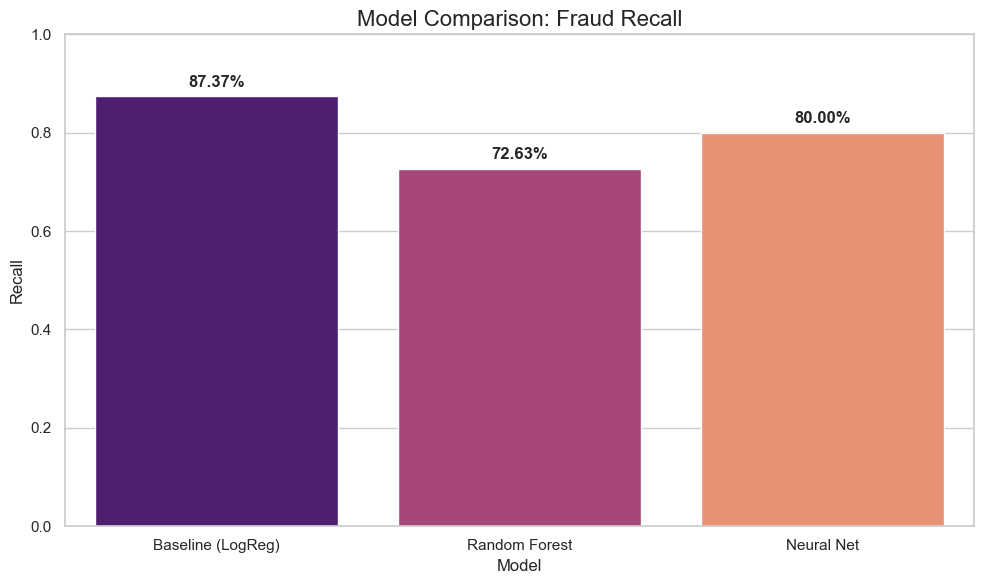

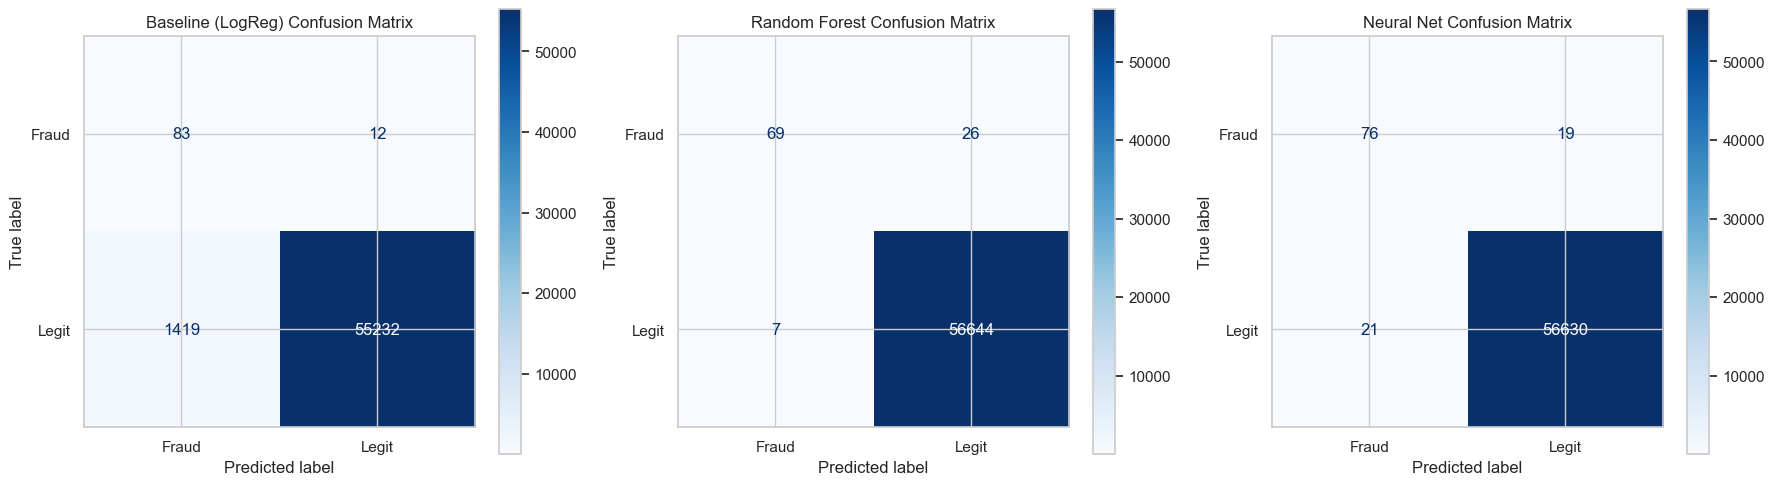

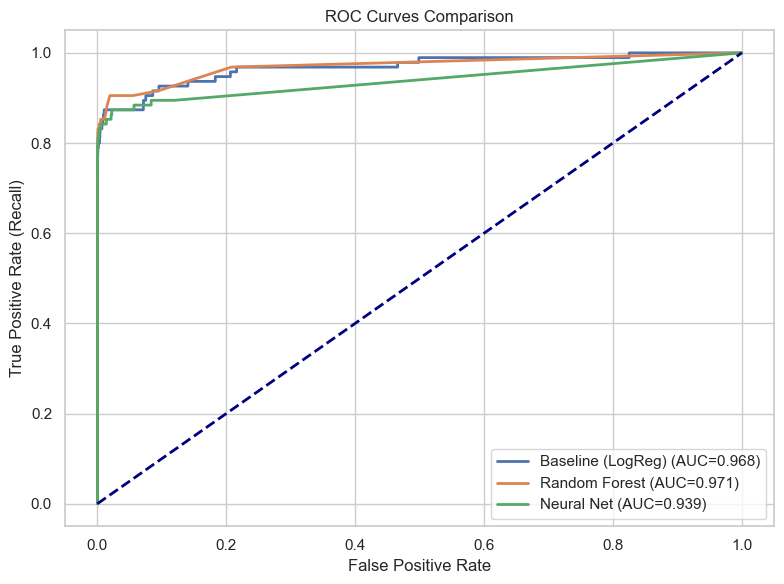

<Figure size 800x600 with 0 Axes>

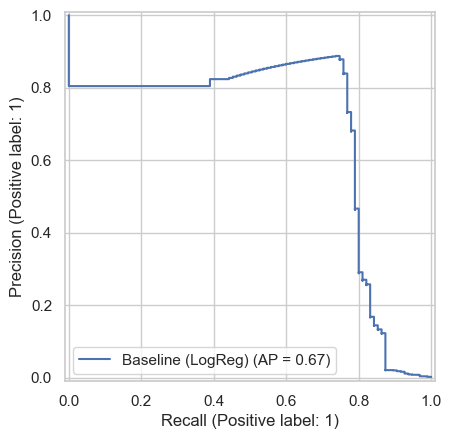

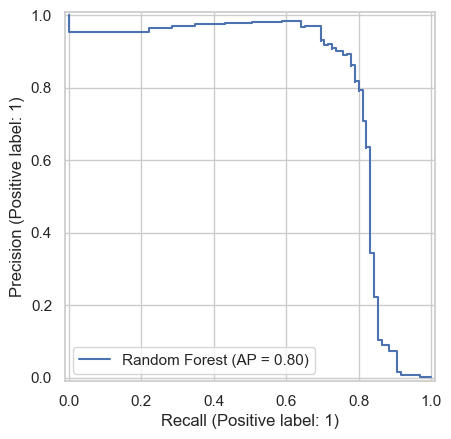

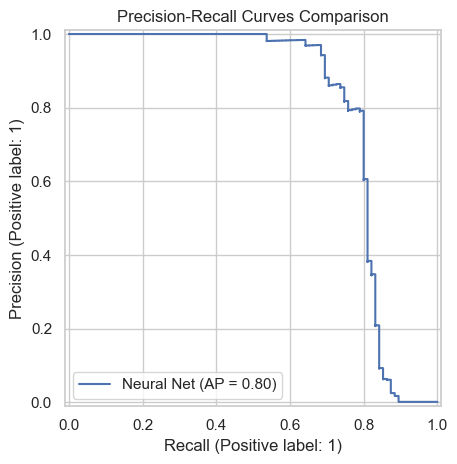


✅ Task C-5 Complete: All metrics calculated and visualizations saved.


In [61]:
# ==============================================================================
# C-5: GENERATE FINAL PERFORMANCE METRICS AND COMPARISON (CORRECTED)
# ==============================================================================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, recall_score, precision_score, f1_score,
    average_precision_score, roc_auc_score, roc_curve,
    confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay
)

print("\n--- Starting Task C-5: Model Evaluation & Comparison ---")

# --- Ensure reports/figures directory exists ---
reports_figures_dir = os.path.join("..", "reports", "figures")
os.makedirs(reports_figures_dir, exist_ok=True)

# --- Load test set (already available from previous cells) ---
print("✅ Using existing X_test and y_test from training split.")

# --- Scale test set consistently ---
X_test_scaled_all = scaler_dl.transform(X_test)

# --- Predictions (using correct model names) ---
# Random Forest
y_pred_rf = rf_model.predict(X_test_scaled_all)
y_prob_rf = rf_model.predict_proba(X_test_scaled_all)[:, 1]

# Neural Network
y_prob_dl = dl_model.predict(X_test_scaled_all, verbose=0).ravel()
y_pred_dl = (y_prob_dl > 0.5).astype(int)

# --- Metrics dictionary ---
models = {
    "Baseline (LogReg)": (y_pred_baseline, y_proba_baseline),
    "Random Forest": (y_pred_rf, y_prob_rf),
    "Neural Net": (y_pred_dl, y_prob_dl)
}

metrics_df = pd.DataFrame(
    columns=["Model", "Recall", "Precision", "F1", "PR AUC", "ROC AUC"])

for name, (y_pred, y_prob) in models.items():
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    pr_auc = average_precision_score(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    metrics_df.loc[len(metrics_df)] = [name, recall,
                                       precision, f1, pr_auc, roc_auc]

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

print("\n--- PERFORMANCE COMPARISON ---")
print(metrics_df.set_index("Model"))

# --- Recall Barplot ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=metrics_df,
    x="Model",
    y="Recall",
    hue="Model",
    palette="magma",
    legend=False
)
plt.title("Model Comparison: Fraud Recall", fontsize=16)
plt.ylabel("Recall")
plt.ylim(0, 1.0)
for i, val in enumerate(metrics_df["Recall"]):
    plt.text(i, val + 0.02, f"{val:.2%}",
             ha="center", fontsize=12, fontweight="bold")
plt.tight_layout()
plt.savefig(os.path.join(reports_figures_dir, "model_comparison_recall.png"))
plt.show()

# --- Combined Confusion Matrices ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, (y_pred, _)) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=["Fraud", "Legit"])
    disp.plot(cmap="Blues", values_format="d", ax=ax)
    ax.set_title(f"{name} Confusion Matrix")
plt.tight_layout()
plt.savefig(os.path.join(reports_figures_dir, "cm_all_models.png"))
plt.show()

# --- ROC Curves ---
plt.figure(figsize=(8, 6))
for name, (_, y_prob) in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curves Comparison")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(reports_figures_dir, "roc_curves_all.png"))
plt.show()

# --- Precision-Recall Curves ---
plt.figure(figsize=(8, 6))
for name, (_, y_prob) in models.items():
    PrecisionRecallDisplay.from_predictions(y_test, y_prob, name=name)
plt.title("Precision-Recall Curves Comparison")
plt.tight_layout()
plt.savefig(os.path.join(reports_figures_dir,
            "precision_recall_curves_all.png"))
plt.show()

print("\n✅ Task C-5 Complete: All metrics calculated and visualizations saved.")

In [ ]:
# ==============================================================================
# C-6: SAVE THE FINAL TRAINED MODELS (CORRECTED)
# ==============================================================================

import os
import joblib
import json
from datetime import datetime, timezone

# --- Ensure models directory exists ---
models_dir = os.path.join("..", "models")
os.makedirs(models_dir, exist_ok=True)

# --- Timezone-aware UTC timestamp ---
timestamp = datetime.now(timezone.utc).isoformat()

# --- Save baseline Logistic Regression pipeline ---
joblib.dump(baseline_model, os.path.join(models_dir, "baseline_logreg.joblib"))

# --- Save Random Forest model ---
joblib.dump(rf_model, os.path.join(models_dir, "fraud_detection_rf.joblib"))

# --- Save ANN model and its scaler ---
dl_model.save(os.path.join(models_dir, "ann_fraud_detection.keras"))
joblib.dump(scaler_dl, os.path.join(models_dir, "ann_scaler.joblib"))

# --- Save metadata for reproducibility ---
metadata = {
    "timestamp": timestamp,
    "random_state": RANDOM_STATE,
    "features": feature_cols,
    "models": {
        "baseline_logreg": "baseline_logreg.joblib",
        "rf_model": "fraud_detection_rf.joblib",
        "ann_model": "ann_fraud_detection.keras",
        "ann_scaler": "ann_scaler.joblib"
    }
}

with open(os.path.join(models_dir, "metadata.json"), "w") as f:
    json.dump(metadata, f, indent=2)

print("✅ All models and metadata saved to:", models_dir)

✅ All models and metadata saved to: ..\models


In [69]:
# ==============================================================================
# Interactive Fraud Detection Chatbot (Fixed & Optimized)
# ==============================================================================
import joblib
import numpy as np
import pandas as pd
import re
import os
from functools import lru_cache

# --- Model/scaler paths ---
BASELINE_MODEL_PATH = "../models/baseline_logreg.joblib"     # Logistic Regression (pipeline)
RF_MODEL_PATH = "../models/fraud_detection_rf.joblib"         # Random Forest
RF_SCALER_PATH = "../models/rf_scaler.joblib"
ANN_MODEL_PATH = "../models/ann_fraud_detection.keras"        # ANN
ANN_SCALER_PATH = "../models/ann_scaler.joblib"
DATASET_PATH = "../data/creditcard_clean.csv"                 # Dataset

# ==============================================================================
# Load Models (cached for faster reuse)
# ==============================================================================
@lru_cache(maxsize=None)
def load_all_models():
    from tensorflow.keras.models import load_model

    print("Loading models...")
    baseline_model = joblib.load(BASELINE_MODEL_PATH)
    rf_model = joblib.load(RF_MODEL_PATH)
    rf_scaler = joblib.load(RF_SCALER_PATH)
    ann_model = load_model(ANN_MODEL_PATH)
    ann_scaler = joblib.load(ANN_SCALER_PATH)
    print("✅ Models loaded successfully.\n")
    return baseline_model, rf_model, rf_scaler, ann_model, ann_scaler


try:
    baseline_model, rf_model, rf_scaler, ann_model, ann_scaler = load_all_models()
except Exception as e:
    raise SystemExit(f"Error loading models or scalers: {e}")


# ==============================================================================
# Load Dataset
# ==============================================================================
if os.path.exists(DATASET_PATH):
    data = pd.read_csv(DATASET_PATH)
    has_label = "IsFraud" in data.columns or "Class" in data.columns
    if "Class" in data.columns:
        data.rename(columns={"Class": "IsFraud"}, inplace=True)
else:
    data, has_label = None, False
    print("⚠️ Warning: Dataset not found. ROW commands will be disabled.")


# ==============================================================================
# Predefined Samples
# ==============================================================================
samples = {
    "A": [-1.359807, -0.072781, 2.536346, 1.378155, -0.338321, 0.462388,
          0.239599, 0.098698, 0.363787, 0.090794, -0.5516, -0.617801,
          -0.99139, -0.311169, 1.468177, -0.4704, 0.207971, 0.025791,
          0.403993, 0.251412, -0.018307, 0.277837, -0.110474, 0.066928,
          0.128539, -0.189115, 0.133558, 0.0, 0.0, 149.62, 0.0],
    "B": [1.191857, 0.266151, 0.166480, 0.448154, 0.060017, -0.082360,
          -0.078802, 0.085101, -0.255425, -0.166974, 1.612726, 1.065235,
          0.489095, -0.143772, 0.635558, 0.463917, -0.114805, -0.183279,
          -0.145783, -0.069083, -0.225775, -0.638671, 0.101288, -0.339846,
          0.167170, 0.125895, -0.008983, 0.0, 0.0, 2.69, 0.0]
}


# ==============================================================================
# Helper Functions
# ==============================================================================
def safe_transform(scaler, sample_array):
    """Transform safely with feature names if available."""
    if hasattr(scaler, "feature_names_in_"):
        sample_array = pd.DataFrame(sample_array, columns=scaler.feature_names_in_)
    return scaler.transform(sample_array)


def classify_transaction(sample, model_choice, label="Custom Input", actual=None):
    """Scale, predict, and print results for the chosen model."""
    sample = list(sample)

    if model_choice == "ann":
        expected_features = getattr(ann_scaler, "n_features_in_", len(sample))
        sample = (sample + [0.0] * (expected_features - len(sample)))[:expected_features]

        sample_array = np.array([sample])
        sample_array = safe_transform(ann_scaler, sample_array)
        proba = ann_model.predict(sample_array, verbose=0).ravel()
        pred = int(proba[0] > 0.5)
        proba_legit, proba_fraud = 1 - proba[0], proba[0]

    elif model_choice == "rf":
        expected_features = getattr(rf_scaler, "n_features_in_", len(sample))
        sample = (sample + [0.0] * (expected_features - len(sample)))[:expected_features]

        sample_array = np.array([sample])
        sample_array = safe_transform(rf_scaler, sample_array)
        pred = int(rf_model.predict(sample_array)[0])
        proba_legit, proba_fraud = rf_model.predict_proba(sample_array)[0]

    else:  # Baseline Logistic Regression pipeline (includes scaler)
        sample_array = np.array([sample])
        pred = int(baseline_model.predict(sample_array)[0])
        proba_legit, proba_fraud = baseline_model.predict_proba(sample_array)[0]

    result = "⚠️ FRAUD DETECTED" if pred == 1 else "✅ Transaction is Legitimate"

    print("\n--- Prediction Result ---")
    print(f"Sample: {label}")
    print(f"Prediction: {result}")
    print(f"Confidence (Legit): {proba_legit:.2%}")
    print(f"Confidence (Fraud): {proba_fraud:.2%}")
    if actual is not None:
        truth = "Fraud" if actual == 1 else "Legitimate"
        print(f"Ground Truth: {truth}")
    print("-------------------------\n")


def get_dataset_row(row_index):
    """Safely fetch a dataset row."""
    if data is None:
        print("Dataset not loaded.")
        return None, None
    if 0 <= row_index < len(data):
        row = data.drop(columns=["IsFraud"], errors="ignore").iloc[row_index].values.tolist()
        actual = data.iloc[row_index]["IsFraud"] if has_label else None
        return row, actual
    print(f"Row {row_index} out of range. Dataset has {len(data)} rows.")
    return None, None


def parse_input(user_input, model_choice):
    """Handle A/B samples, ROW commands, or numeric input."""
    user_input = user_input.strip()
    if user_input.lower() in ["exit", "quit"]:
        print("Goodbye!")
        return False
    if user_input.lower() in ["help", "commands"]:
        print("\nOptions:")
        print(" - Predefined samples: A, B")
        print(" - Dataset row: ROW <number>")
        print(" - Custom input: 31 numeric values (comma or space-separated)")
        print(" - Type 'exit' to quit\n")
        return True

    if user_input.upper() in samples:
        classify_transaction(samples[user_input.upper()], model_choice, user_input.upper())
        return True

    match = re.match(r"ROW\s+(\d+)", user_input, re.IGNORECASE)
    if match:
        row_index = int(match.group(1))
        row, actual = get_dataset_row(row_index)
        if row is not None:
            classify_transaction(row, model_choice, f"ROW {row_index}", actual)
        return True

    if re.match(r"^([\d\.\-]+[,\s]?)+$", user_input):
        nums = [float(x) for x in re.split(r"[,\s]+", user_input.strip()) if x]
        classify_transaction(nums, model_choice, "Custom Input")
        return True

    print("Invalid input. Type 'help' for valid commands.")
    return True


# ==============================================================================
# Chatbot Interface
# ==============================================================================
def chatbot():
    print("=== 💬 Smart Fraud Detection Chatbot ===")
    print("Choose a model:")
    print(" 1. baseline   → Logistic Regression")
    print(" 2. rf         → Random Forest")
    print(" 3. ann        → Neural Network")

    model_choice = None
    while model_choice not in ["baseline", "rf", "ann"]:
        model_choice = input("Your model choice: ").strip().lower()
    
    print(f"\nUsing model: {model_choice.upper()}")
    print("Type 'help' for options.\n")

    running = True
    while running:
        user_input = input("Your choice: ")
        running = parse_input(user_input, model_choice)


# ==============================================================================
# Run Chatbot
# ==============================================================================
if __name__ == "__main__":
    chatbot()


Loading models...
✅ Models loaded successfully.

=== 💬 Smart Fraud Detection Chatbot ===
Choose a model:
 1. baseline   → Logistic Regression
 2. rf         → Random Forest
 3. ann        → Neural Network

Using model: ANN
Type 'help' for options.

Invalid input. Type 'help' for valid commands.

--- Prediction Result ---
Sample: ROW 10
Prediction: ✅ Transaction is Legitimate
Confidence (Legit): 100.00%
Confidence (Fraud): 0.00%
Ground Truth: Legitimate
-------------------------


--- Prediction Result ---
Sample: A
Prediction: ✅ Transaction is Legitimate
Confidence (Legit): 100.00%
Confidence (Fraud): 0.00%
-------------------------

Goodbye!
